In [5]:
from sqlalchemy import create_engine

In [16]:
from sqlalchemy import text

In [6]:
import pandas as pd

In [7]:
%matplotlib inline

In [10]:
cnxn_string = ("postgresql+psycopg://{username}:{pswd}@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg://{username}:{pswd}@{host}:{port}/{database}


In [11]:
engine = create_engine(cnxn_string.format(
                    username = "postgres",
                    pswd = "Metamorphic5280",
                    host = "localhost",
                    port = 5432,
                    database = "world"))


In [12]:
conn = engine.connect()

In [17]:
result = conn.execute(text("""SELECT 
    country.name AS Country,
    COUNT(*) AS NumberOfOfficialLanguages
FROM country
JOIN countrylanguage
      ON country.code = countrylanguage.countrycode
WHERE countrylanguage.isofficial = 'T'
GROUP BY country.name
HAVING COUNT(*) > 2
ORDER BY NumberOfOfficialLanguages DESC;"""))

In [18]:
pd.DataFrame(result.fetchall(), columns=result.keys())

,country,numberofofficiallanguages
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


In [19]:
import matplotlib.pyplot as plt


In [27]:
query = text("""
    SELECT 
        country.name AS name,
        COUNT(*) AS num_of_languages
    FROM country
    JOIN countrylanguage
      ON country.code = countrylanguage.countrycode
    WHERE countrylanguage.isofficial = 'T'
    GROUP BY country.name
    HAVING COUNT(*) > 2
    ORDER BY num_of_languages DESC;
""")


In [28]:
with engine.connect() as conn:
    df = pd.DataFrame(conn.execute(query).fetchall(), columns=["name", "num_of_languages"])


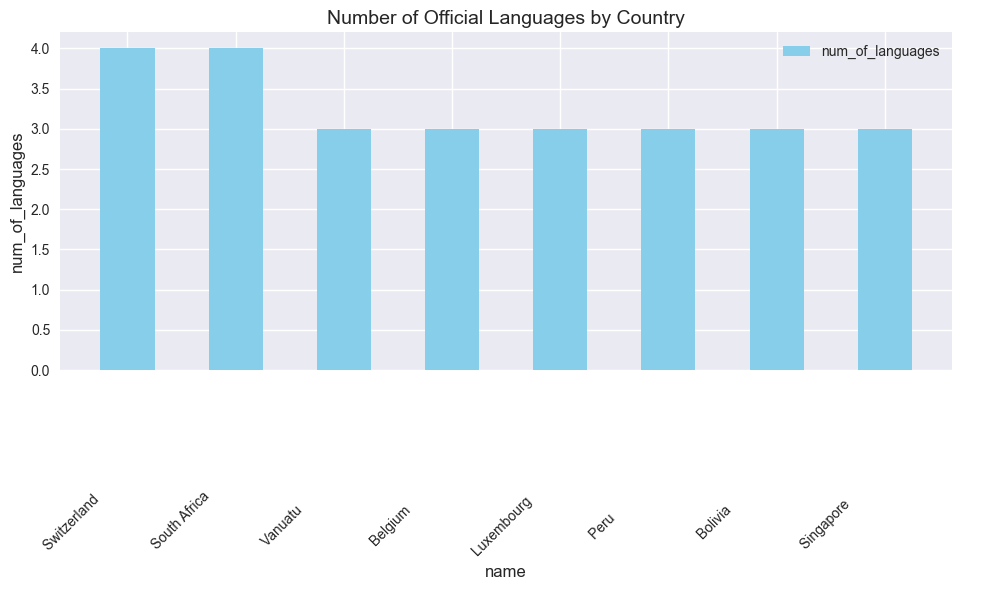

In [31]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df['name'], df['num_of_languages'], width=0.5, color='skyblue', label='num_of_languages')

ax.set_xlabel('name', fontsize=12)
ax.set_ylabel('num_of_languages', fontsize=12)
ax.set_title('Number of Official Languages by Country', fontsize=14)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
